# breast cancer biopsy

-Fabrizio Rios
-Leonardo Avila

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv('DATASET_RIOSAVILA_EC1.csv', sep=',')



In [7]:
df.head(20)


,ID,THINCKNESS,SIZE,SHAPE,ADHESION,SINGLE,NUCLEI,CHROMATIN,NUCLEOLI,MITOSIS,RESULT
0,1000025.0,5,1,1,1,2,1.0,3,1,1,0
1,1002945.0,5,4,4,5,7,10.0,3,2,1,0
2,1015425.0,3,1,1,1,2,2.0,3,1,1,0
3,1016277.0,6,8,8,1,3,4.0,3,7,1,0
4,1017023.0,4,1,1,3,2,1.0,3,1,1,0
5,1017122.0,8,10,10,8,7,10.0,9,7,1,1
6,1018099.0,1,1,1,1,2,10.0,3,1,1,0
7,1018561.0,2,1,2,1,2,1.0,3,1,1,0
8,1033078.0,2,1,1,1,2,1.0,1,1,5,0
9,1033078.0,4,2,1,1,2,1.0,2,1,1,0


 Precisión del modelo KNN: 96.10%

 Reporte de Clasificación:

              precision  recall  f1-score  support
Benigno (0)        0.97    0.97      0.97   267.00
Maligno (1)        0.94    0.95      0.94   143.00
accuracy           0.96    0.96      0.96     0.96
macro avg          0.96    0.96      0.96   410.00
weighted avg       0.96    0.96      0.96   410.00
Análisis de Errores:
- Verdaderos Negativos (Benignos detectados correctamente): 258
- Falsos Positivos (Benignos mal clasificados como malignos): 9
- Falsos Negativos (Malignos mal clasificados como benignos): 7
- Verdaderos Positivos (Malignos detectados correctamente): 136
 Porcentaje de Falsos Positivos: 2.20%
Porcentaje de Falsos Negativos: 1.71%


C:\Users\PC-01\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


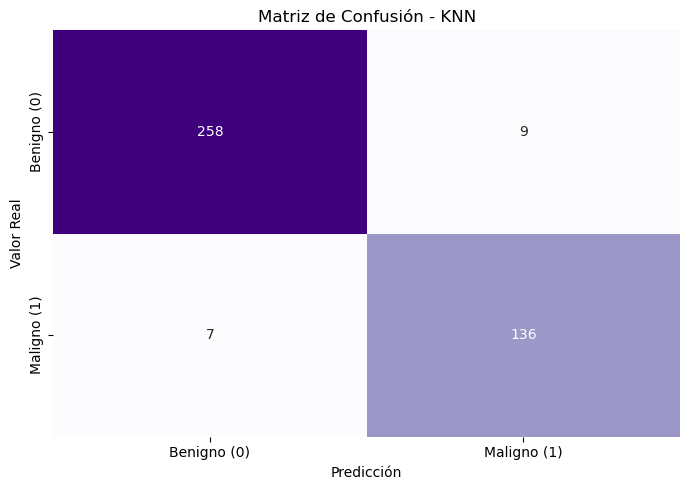

In [19]:

# Separar características (X) y etiqueta (y)
X = df.drop('RESULT', axis=1)
y = df['RESULT']

# Dividir en conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42, stratify=y)

# Escalamiento de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar k
knn_model.fit(X_train_scaled, y_train)

# Predicción en el conjunto de prueba
y_pred = knn_model.predict(X_test_scaled)

# Evaluación
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Benigno (0)', 'Maligno (1)'], output_dict=True)

# Mostrar resultados
print(f" Precisión del modelo KNN: {accuracy*100:.2f}%\n")

# Reporte de clasificación detallado
report_df = pd.DataFrame(report).transpose().round(2)
print(" Reporte de Clasificación:\n")
print(report_df)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Extraer valores de la matriz
tn, fp, fn, tp = conf_matrix.ravel()

print("Análisis de Errores:")
print(f"- Verdaderos Negativos (Benignos detectados correctamente): {tn}")
print(f"- Falsos Positivos (Benignos mal clasificados como malignos): {fp}")
print(f"- Falsos Negativos (Malignos mal clasificados como benignos): {fn}")
print(f"- Verdaderos Positivos (Malignos detectados correctamente): {tp}")

# Porcentajes de error
total = tn + fp + fn + tp
fp_rate = (fp / total) * 100
fn_rate = (fn / total) * 100

print(f" Porcentaje de Falsos Positivos: {fp_rate:.2f}%")
print(f"Porcentaje de Falsos Negativos: {fn_rate:.2f}%")

# Gráfico de la matriz de confusión
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['Benigno (0)', 'Maligno (1)'], yticklabels=['Benigno (0)', 'Maligno (1)'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - KNN')
plt.tight_layout()
plt.show()


